# Prediction of IRONMAN 70.3 Performance Using Machine Learning

## Introducció

El **triatló IRONMAN** és una competició esportiva que consta de **3,86 km de natació, 180,25 km de bicicleta i 42,2 km de carrera a peu**. L'IRONMAN es va establir a Hawaii l'any 1978 i, des de llavors, ha atret molts atletes a participar en una de les curses d'un dia més dures. Els tres esports (natació, ciclisme i córrer) es completen en una sessió; per tant, no hi ha descans per als atletes a causa de la competició. Fins i tot les zones de transició, on un esportista es prepara per al següent esport, es fan tan ràpid com sigui possible. Els atletes participen en dues categories: una categoria PRO i grups d'edat (AG). La categoria PRO és només una i està destinada a competidors per als quals el triatló és la seva professió, mentre que alguns dels AG són aplicables a altres competidors. **IRONMAN 70.3 és l'anomenat half-IRONMAN**, que consta d'1,9 km de natació, 90 km de bicicleta i 21 km de carrera.

- Aquest dataset és una versió preprocessada de les dades en brut tal com es descarrega del lloc web oficial d'Ironman.
- El dataset inclou 840.075 registres d'Ironman 70.3 PRO i de triatletes recreatius (grups d'edat) entre 2004 i 2020, amb el seu gènere, país d'origen, grup d'edat (no per PRO) i ubicació i any de la competició Ironman 70.3.

La meva motivació per fer aquesta anàlisi ha estat:

- Exercir diversos mètodes i tècniques estadístiques descriptives i inferencials (buscar histogrames, diagrames de caixa, etc).
- Construir un model predictiu i utilitzar diferents eines d'interpretabilitat del model per explorar com cadascuna de les variables predictives (edat, gènere, país d'origen i ubicació de la cursa) va contribuir a les prediccions del model del temps de la carrera.

## Neteja de Dades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\julia\DATA SCIENCE IT\FINAL PROJECT\Half_Ironman_df6.csv")
df

,Gender,AgeGroup,AgeBand,Country,CountryISO2,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,AD,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,AD,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,AD,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840070,M,50-54,50,Zimbabwe,ZW,2015,IRONMAN 70.3 South Africa,2054,261,10527,160,6070,19072
840071,M,40-44,40,Zimbabwe,ZW,2015,IRONMAN 70.3 South Africa,2449,352,11866,265,8461,23393
840072,F,30-34,30,Zimbabwe,ZW,2015,IRONMAN 70.3 Steelhead,2171,357,11433,332,7754,22047
840073,F,35-39,35,Zimbabwe,ZW,2015,IRONMAN 70.3 Budapest,2100,193,10280,233,6148,18954


Les dades s'han extret del lloc web (30/01/24): https://www.kaggle.com/datasets/aiaiaidavid/ironman-703-race-data-between-2004-and-2020/data
El fitxer CSV descarregat de Kaggle constitueix la base de dades que s'utilitzarà per al projecte final de Data Science i conté les variables següents:

- **Gènere:** El gènere del participant amb els valors 'M' (Masculí) i 'F' (Dona). (Variable categòrica)

- **AgeGroup:** Grup d'edat dels participants. (Variable categòrica)

- **AgeBand:** Representació numèrica del grup d'edat. Per exemple, "40" correspon al grup d'edat "40-44". (variable numèrica)

- **País:** el país d'origen del participant. (Variable categòrica)

- **CountryISO2:** codi estandarditzat de dues lletres per a cada país. (Variable categòrica)

- **EventYear:** l'any en què va tenir lloc l'esdeveniment. (variable numèrica)

- **EventLocation:** La ubicació o el nom de l'esdeveniment. (Variable categòrica)

- **SwimTime:** El temps que triga el participant a la part de natació de l'esdeveniment, mesurat en segons. (Variable numèrica)

- **Transition1Time:** el temps trigat durant la primera transició entre la natació i el ciclisme, mesurat en segons. (Variable numèrica)

- **BikeTime:** El temps que triga el participant a la part de ciclisme de l'esdeveniment, mesurat en segons. (Variable numèrica)

- **Transition2Time:** el temps trigat durant la segona transició entre anar en bicicleta i córrer, mesurat en segons. (Variable numèrica)

- **Temps d'execució:** El temps que triga el participant a la part de carrera de l'esdeveniment, mesurat en alguna unitat de temps. (Variable numèrica)

- **FinishTime:** El temps total que triga el participant a acabar tot l'esdeveniment, des de l'inici de la natació fins al final de la carrera, mesurat en segons. (Variable numèrica)

Cada fila del conjunt de dades sembla representar les dades d'un participant en un esdeveniment específic. El conjunt de dades recull diversos aspectes, com ara informació demogràfica (sexe, edat), país d'origen, detalls de l'esdeveniment i horaris per a diferents segments del triatló.

El següent pas consisteix a netejar el conjunt de dades: visualització de valors nuls, informació, eliminació de columnes, etc.

In [3]:
df.isnull().sum()

Gender             0
AgeGroup           0
AgeBand            0
Country            0
CountryISO2        0
EventYear          0
EventLocation      0
SwimTime           0
Transition1Time    0
BikeTime           0
Transition2Time    0
RunTime            0
FinishTime         0
dtype: int64

There are not null values in this dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840075 entries, 0 to 840074
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Gender           840075 non-null  object
 1   AgeGroup         840075 non-null  object
 2   AgeBand          840075 non-null  int64 
 3   Country          840075 non-null  object
 4   CountryISO2      840075 non-null  object
 5   EventYear        840075 non-null  int64 
 6   EventLocation    840075 non-null  object
 7   SwimTime         840075 non-null  int64 
 8   Transition1Time  840075 non-null  int64 
 9   BikeTime         840075 non-null  int64 
 10  Transition2Time  840075 non-null  int64 
 11  RunTime          840075 non-null  int64 
 12  FinishTime       840075 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 83.3+ MB


El tipus de variables és correcte. Eliminaré la columna "CountryISO2", perquè no és necessari en aquesta anàlisi.

In [5]:
df = df.drop('CountryISO2', axis=1)
df

,Gender,AgeGroup,AgeBand,Country,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008
...,...,...,...,...,...,...,...,...,...,...,...,...
840070,M,50-54,50,Zimbabwe,2015,IRONMAN 70.3 South Africa,2054,261,10527,160,6070,19072
840071,M,40-44,40,Zimbabwe,2015,IRONMAN 70.3 South Africa,2449,352,11866,265,8461,23393
840072,F,30-34,30,Zimbabwe,2015,IRONMAN 70.3 Steelhead,2171,357,11433,332,7754,22047
840073,F,35-39,35,Zimbabwe,2015,IRONMAN 70.3 Budapest,2100,193,10280,233,6148,18954


## Analisis descriptiu

In [6]:
df.describe(include='all').round(2)

,Gender,AgeGroup,AgeBand,Country,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
count,840075,840075,840075.00,840075,840075.00,840075,840075.00,840075.00,840075.00,840075.00,840075.00,840075.00
unique,2,15,NaN,240,NaN,195,NaN,NaN,NaN,NaN,NaN,NaN
top,M,35-39,NaN,United States,NaN,IRONMAN 70.3 World Championship,NaN,NaN,NaN,NaN,NaN,NaN
freq,635680,160918,NaN,332037,NaN,26123,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,36.90,NaN,2015.11,NaN,2340.25,286.68,10675.31,219.79,7606.97,21129.01
std,NaN,NaN,10.84,NaN,3.18,NaN,486.45,98.42,1397.95,94.24,1588.10,3076.23
min,NaN,NaN,0.00,NaN,2004.00,NaN,1201.00,46.00,6511.00,46.00,4002.00,13004.00
25%,NaN,NaN,30.00,NaN,2013.00,NaN,2010.00,211.00,9682.00,147.00,6440.00,18919.00
50%,NaN,NaN,35.00,NaN,2016.00,NaN,2286.00,280.00,10503.00,205.00,7362.00,20839.00
75%,NaN,NaN,45.00,NaN,2018.00,NaN,2604.00,359.00,11483.00,279.00,8544.00,23052.00


Aquest anàlisi proporciona informació sobre les característiques estadístiques i la distribució de les variables en el conjunt de dades. Abans d'analitzar punt per punt, he vist alguna dada que no em quadra. La edat minima es 0. Procedeixo a estudiar i veure que passa amb aquest valor d'edat.

In [7]:
age_group_00_rows = df.loc[df['AgeGroup'] == '00']
age_group_00_rows

,Gender,AgeGroup,AgeBand,Country,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
162,F,00,0,United Arab Emirates,2020,IRONMAN 70.3 Les Sables d'Olonne,1738,183,9276,120,4839,16156
193,F,00,0,United Arab Emirates,2020,IRONMAN 70.3 Dubai,1702,164,8039,165,4953,15023
424,M,00,0,United Arab Emirates,2011,IRONMAN 70.3 Asia-Pacific,1433,96,8638,105,4837,15109
477,M,00,0,United Arab Emirates,2012,IRONMAN 70.3 World Championship,1449,163,7985,74,4936,14607
604,F,00,0,Anguilla,2014,IRONMAN 70.3 Raleigh,1454,91,8901,79,5446,15971
...,...,...,...,...,...,...,...,...,...,...,...,...
839908,M,00,0,South Africa,2015,IRONMAN 70.3 Switzerland,1437,115,8780,80,5366,15778
839930,F,00,0,South Africa,2015,IRONMAN 70.3 Racine,1490,173,8871,82,5605,16221
839932,F,00,0,South Africa,2015,IRONMAN 70.3 Racine,1616,207,9640,92,6866,18421
839940,F,00,0,South Africa,2015,IRONMAN 70.3 Putrajaya,1766,110,9453,91,7045,18465


Hi ha 16611 files de les quals l'edat registrada es 0, es tracta de la modalitat PRO. No especifica l'edat però.

## Anàlisi exploratòria de dades (EDA)
Aquesta secció cobreix la gestió de les dades que falten, el resum estadístic i, principalment, la visualització de dades.

In [8]:
df.describe(include='all').round(2)

,Gender,AgeGroup,AgeBand,Country,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
count,840075,840075,840075.00,840075,840075.00,840075,840075.00,840075.00,840075.00,840075.00,840075.00,840075.00
unique,2,15,NaN,240,NaN,195,NaN,NaN,NaN,NaN,NaN,NaN
top,M,35-39,NaN,United States,NaN,IRONMAN 70.3 World Championship,NaN,NaN,NaN,NaN,NaN,NaN
freq,635680,160918,NaN,332037,NaN,26123,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,36.90,NaN,2015.11,NaN,2340.25,286.68,10675.31,219.79,7606.97,21129.01
std,NaN,NaN,10.84,NaN,3.18,NaN,486.45,98.42,1397.95,94.24,1588.10,3076.23
min,NaN,NaN,0.00,NaN,2004.00,NaN,1201.00,46.00,6511.00,46.00,4002.00,13004.00
25%,NaN,NaN,30.00,NaN,2013.00,NaN,2010.00,211.00,9682.00,147.00,6440.00,18919.00
50%,NaN,NaN,35.00,NaN,2016.00,NaN,2286.00,280.00,10503.00,205.00,7362.00,20839.00
75%,NaN,NaN,45.00,NaN,2018.00,NaN,2604.00,359.00,11483.00,279.00,8544.00,23052.00


- **Gender (Gènere):** Conté dues categories, 'M' (Masculí) i 'F' (Femení), amb una majoria de 635.680 registres masculins.

- **AgeGroup (Grup d'Edat):** Amb 15 categories diferents, destaca '35-39' com la més freqüent amb 160.918 registres.

- **AgeBand (Grup d'Edat):** Amb una mitjana de 36,90 i una desviació estàndard de 10,84, aquesta columna representa la distribució d'edats amb un mínim de 0 i un màxim de 85.

- **Country (País):** Amb 240 països únics, destaca 'United States' com el país més freqüent amb 332.037 registres.

- **EventYear (Any de l'Event):** Amb una mitjana de 2015,11 i una desviació estàndard de 3,18, representa els anys en què es van realitzar els esdeveniments, oscil·lant entre 2004 i 2020.

- **EventLocation (Ubicació de l'Event):** Amb 195 ubicacions úniques, 'IRONMAN 70.3 World Championship' destaca com la ubicació més freqüent amb 26.123 registres.

- **SwimTime (Temps de Natació):** Amb una mitjana de 2340,25 segons i una desviació estàndard de 486,45 segons, representa els temps de natació amb un mínim de 1201 segons i un màxim de 5997 segons. Equivalència en hh:mm:ss: 00:38:42 (mitjana).

- **Transition1Time (Temps de Transició 1):** Amb una mitjana de 286,68 segons i una desviació estàndard de 98,42 segons, representa els temps de transició 1 amb un mínim de 46 segons i un màxim de 499 segons. Equivalència en hh:mm:ss: 00:04:46 (mitjana).

- **BikeTime (Temps de Ciclisme):** Amb una mitjana de 10.675,31 segons i una desviació estàndard de 1.397,95 segons, representa els temps de ciclisme amb un mínim de 6511 segons i un màxim de 17.993 segons. Equivalència en hh:mm:ss: 02:57:55 (mitjana).

- **Transition2Time (Temps de Transició 2):** Amb una mitjana de 219,79 segons i una desviació estàndard de 94,24 segons, representa els temps de transició 2 amb un mínim de 46 segons i un màxim de 499 segons. Equivalència en hh:mm:ss: 00:03:39 (mitjana).

- **RunTime (Temps de Cursa):** Amb una mitjana de 7606,97 segons i una desviació estàndard de 1588,10 segons, representa els temps de cursa amb un mínim de 4002 segons i un màxim de 14.999 segons. Equivalència en hh:mm:ss: 02:06:46 (mitjana).

- **FinishTime (Temps Final):** Amb una mitjana de 21.129,01 segons i una desviació estàndard de 3.076,23 segons, representa els temps finals amb un mínim de 13.004 segons i un màxim de 36.529 segons. Equivalència en hh:mm:ss: 05:52:09 (mitjana).

## Distribució de les variables

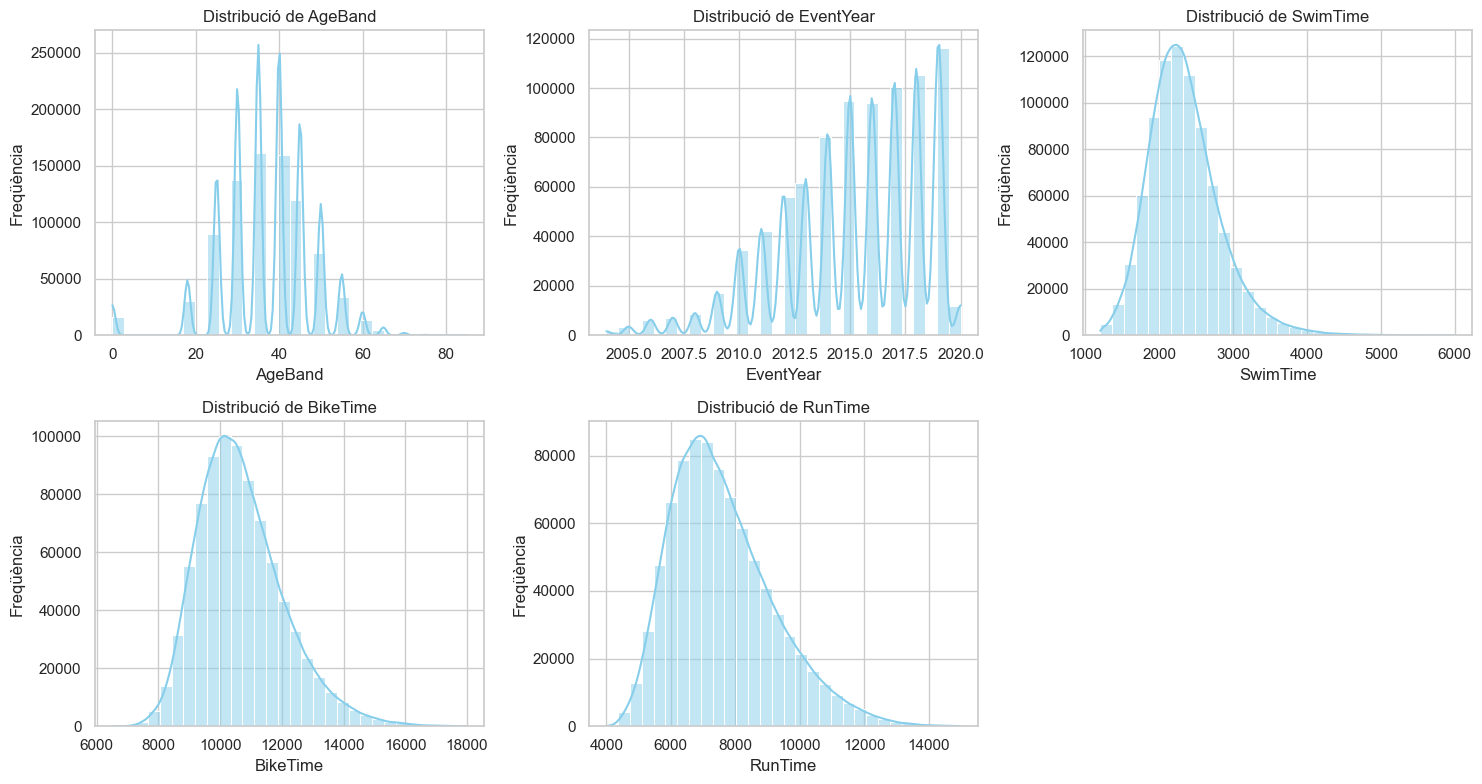

In [9]:
sns.set(style="whitegrid")
numeric_variables = ['AgeBand', 'EventYear', 'SwimTime', 'BikeTime', 'RunTime']

# Crear gràfics
plt.figure(figsize=(15, 8))
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribució de {var}')
    plt.xlabel(var)
    plt.ylabel('Freqüència')

plt.tight_layout()
plt.show()


- L'edat mitjana dels participants volta entre els 35 i 40 anys. 
- Els events tenen lloc en un rang d'anys des de el 2004 fins el 2020, s'observa com el nombre de registres augmenta amb el pas dels anys, ja que es fan més events a diferents llocs i també perque hi ha un augmnent dels participants a causa d'això. 
- El temps mitjà de natació és entre 2000 i 3000 segons, que equivaldria a uns 40 minuts aproximadament.
- El temps mitjà de ciclisme es de 10.000 segons, que equivaldria a unes 3 hores.
- El temps mitjà de cursa és d'aproximadament 7000 segons que equivaldria a unes 2 hores

## Correlació entre Variables

C:\Users\julia\AppData\Local\Temp\ipykernel_29260\2333164073.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


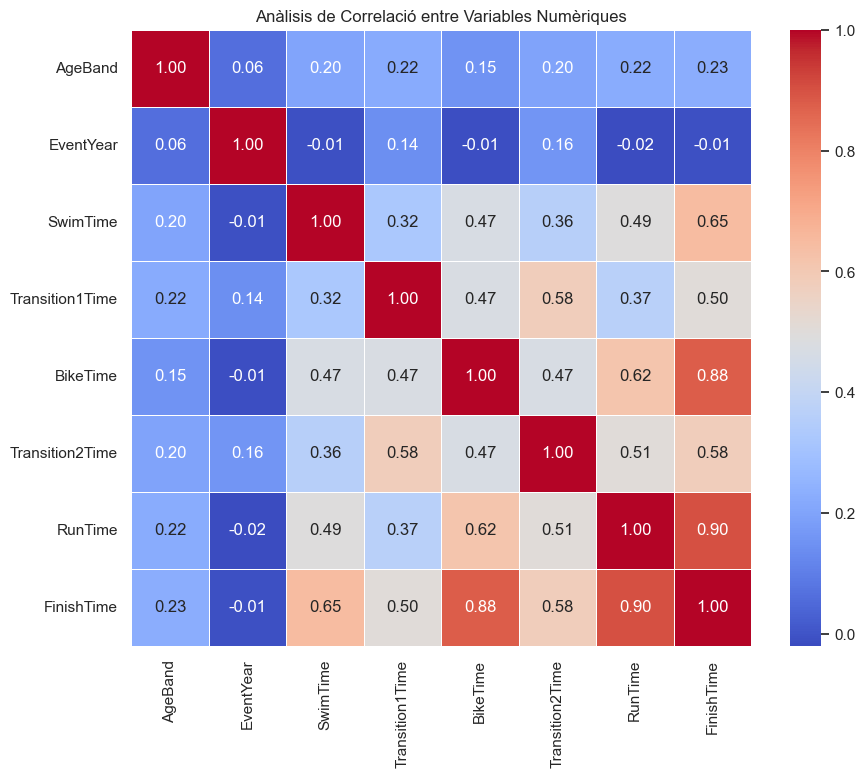

In [10]:
# Anàlisi de Correlació
correlation_matrix = df.corr()

# Crear un mapa de calor per visualitzar la correlació
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Anàlisis de Correlació entre Variables Numèriques')
plt.show()

### Correlacions:

Forta:

- FinishTime y RunTime: 0.901590
- BikeTime y FinishTime: 0.876878
- BikeTime y RunTime: 0.617405
- Transition2Time y FinishTime: 0.579543
- Transition1Time y BikeTime: 0.470587

Moderada:

- SwimTime y FinishTime: 0.646254
- SwimTime y RunTime: 0.490521
- BikeTime y Transition2Time: 0.468097
- Transition2Time y Transition1Time: 0.579792

Les correlacions, tal com es representen en el mapa de calor, ofereixen una visió completa de les relacions lineals entre les variables del conjunt de dades.

Destaquem una correlació molt forta i positiva entre 'FinishTime' i 'RunTime' (i viceversa) amb un valor de 0,901590. Això indica una relació significativa entre el temps total de la competició (FinishTime) i el temps de la cursa (RunTime).
També es destaquen correlacions positives fortes com 'FinishTime' i 'BikeTime' (0,876878) i 'SwimTime' i 'FinishTime' (0,646254).
En el rang de correlacions positives moderades, destaquem 'RunTime' i 'BikeTime' (0,617405), 'Transition2Time' i 'Transition1Time' (0,579792), 'FinishTime' i 'Transition2Time' (0,579543), entre d'altres.
No es detecten correlacions negatives fortes; en general, aquestes són febles. Així, podem concloure que les variables estan més correlacionades positivament entre elles, destacant la forta influència del temps de cursa (RunTime) en el temps total de la competició (FinishTime).

## Anàlisi de Tendències Temporals

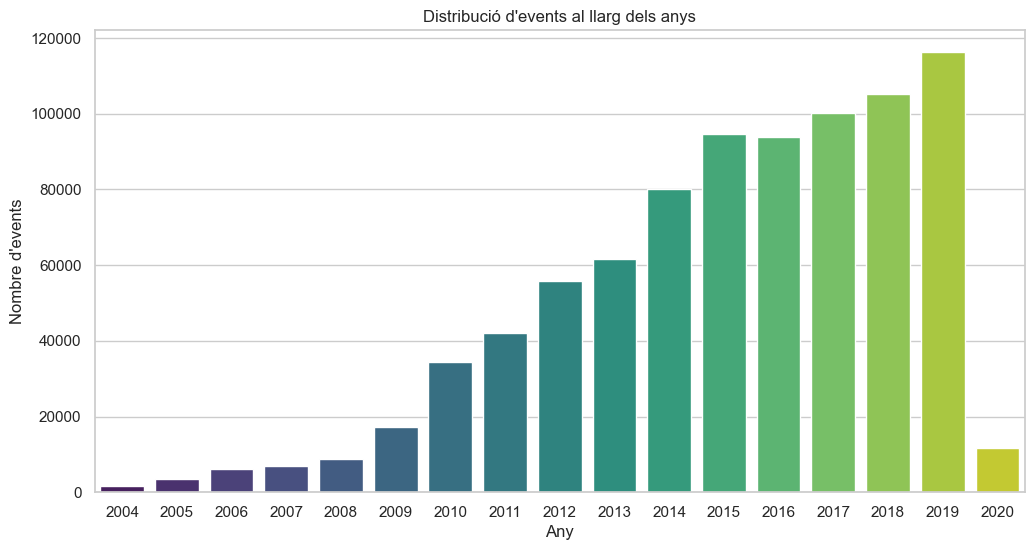

In [11]:
# Visualitzar la distribució d'events al llarg dels anys
plt.figure(figsize=(12, 6))
sns.countplot(x='EventYear', data=df, palette='viridis')
plt.title("Distribució d'events al llarg dels anys")
plt.xlabel("Any")
plt.ylabel("Nombre d'events")
plt.show()

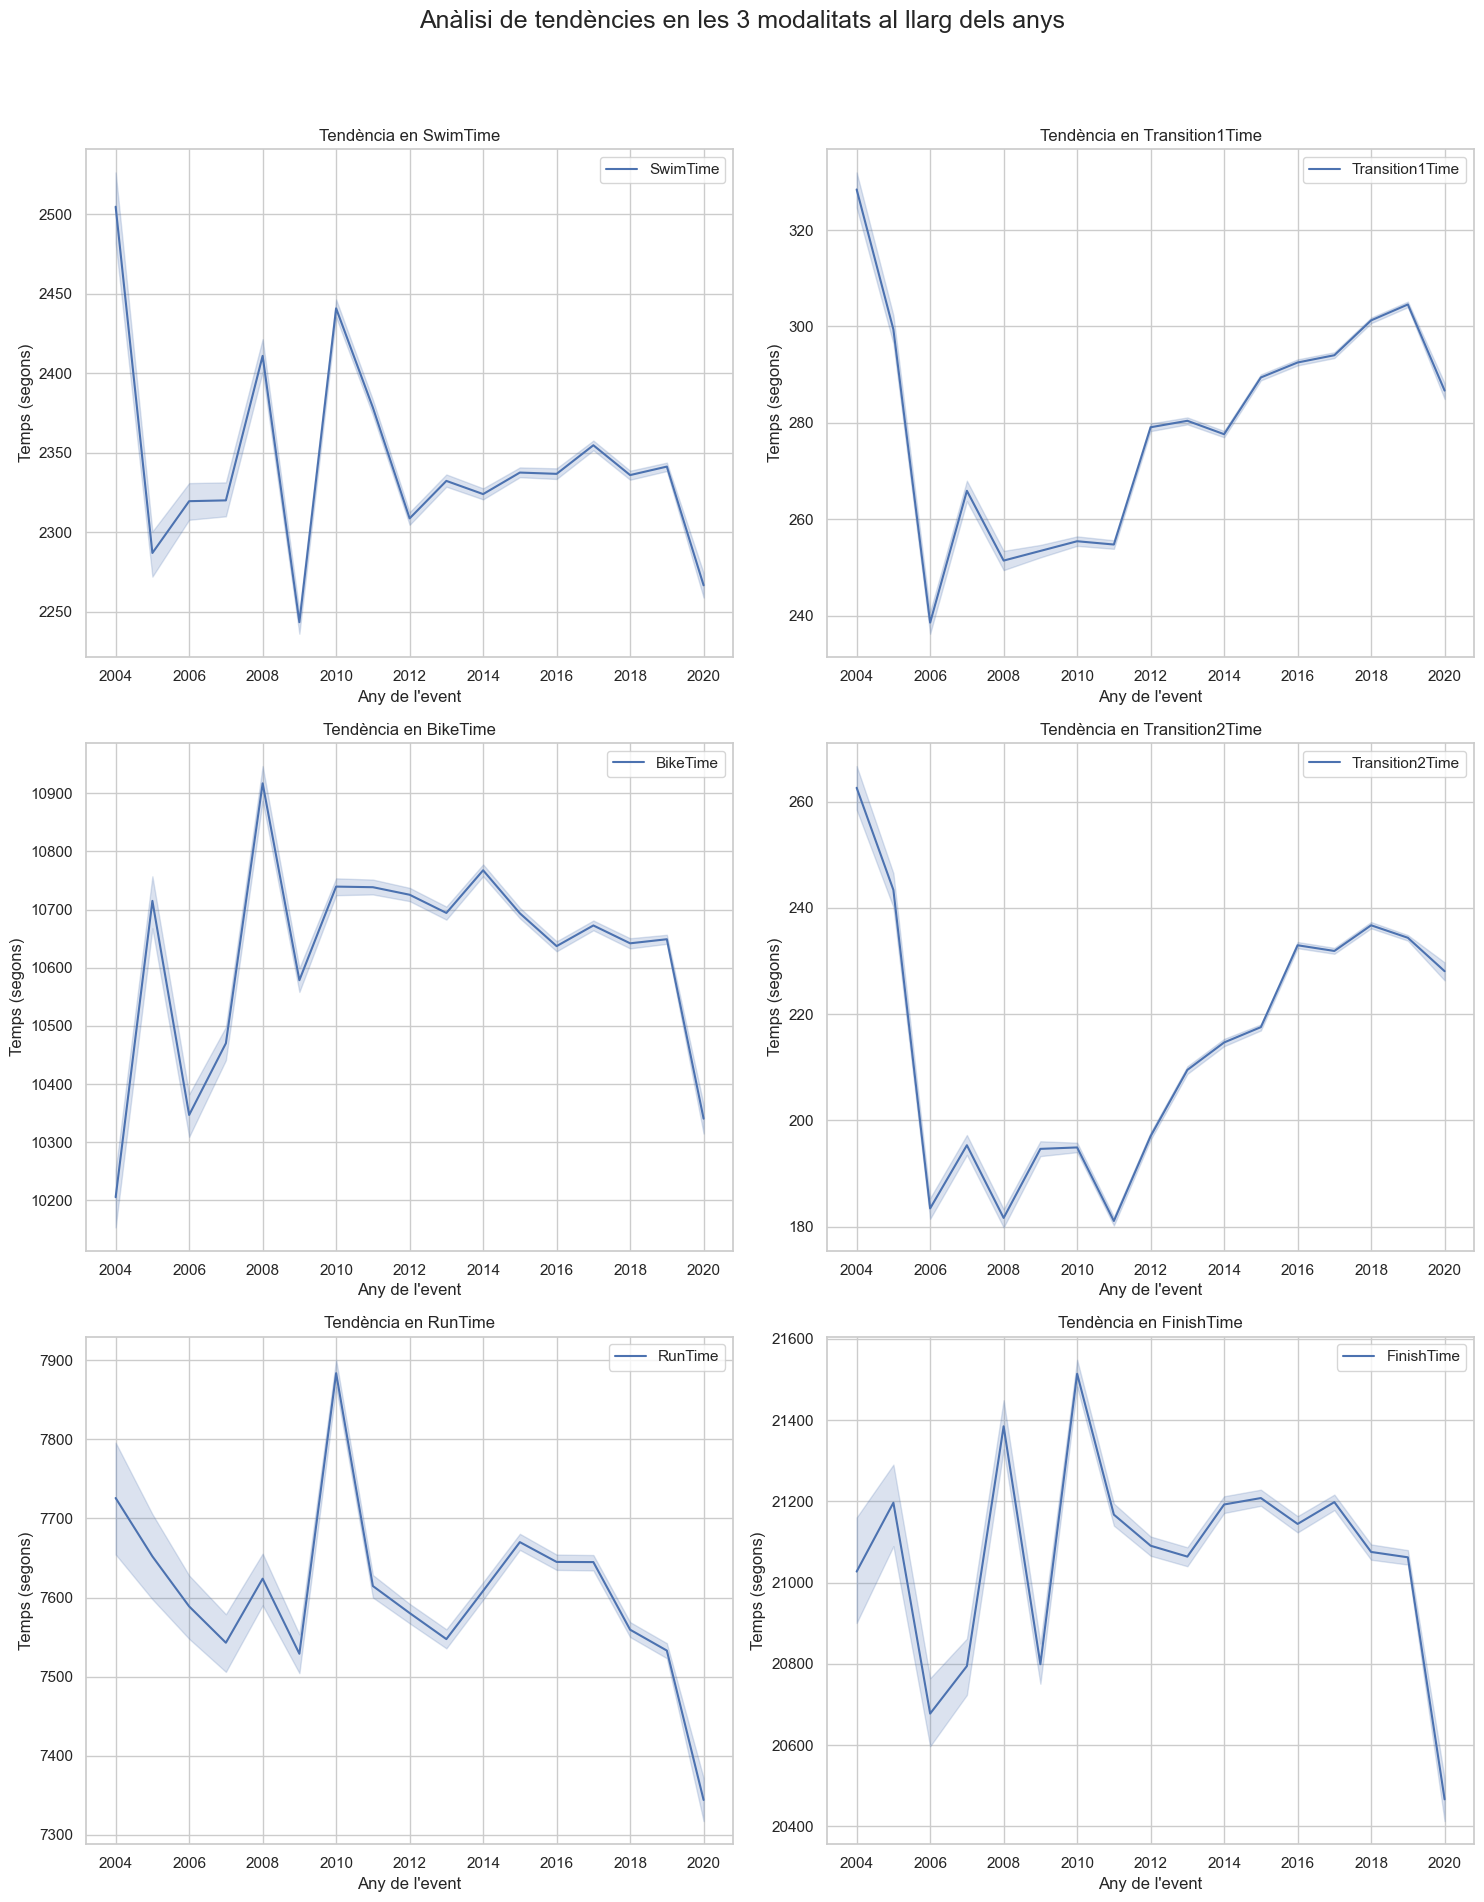

In [12]:
# Analisi de tendències en les 3 modalitats al llarg dels anys
time_variables = ['SwimTime', 'Transition1Time', 'BikeTime', 'Transition2Time', 'RunTime', 'FinishTime']

plt.figure(figsize=(15, 20))  
for i, var in enumerate(time_variables, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='EventYear', y=var, data=df, label=var)
    plt.title(f'Tendència en {var}')
    plt.xlabel("Any de l'event")
    plt.ylabel('Temps (segons)')
    plt.legend()
    

plt.suptitle('Anàlisi de tendències en les 3 modalitats al llarg dels anys', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Comparació entre Països

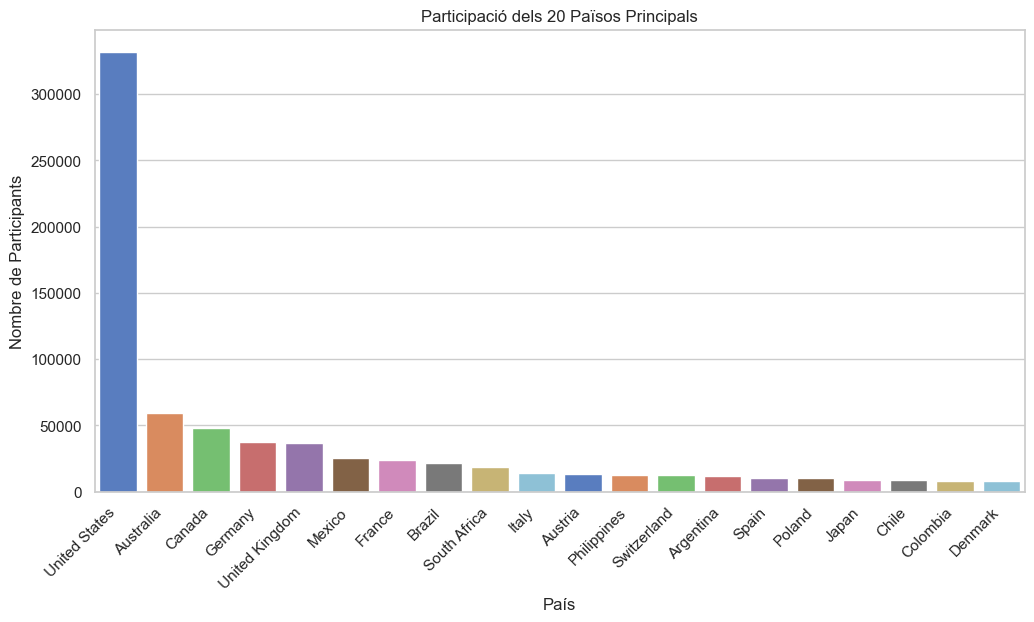

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, palette='muted', order=df['Country'].value_counts().head(20).index)
plt.title('Participació dels 20 Països Principals')
plt.xlabel('País')
plt.ylabel('Nombre de Participants')
plt.xticks(rotation=45, ha='right')  
plt.show()


## Rendiment per grups d'edat

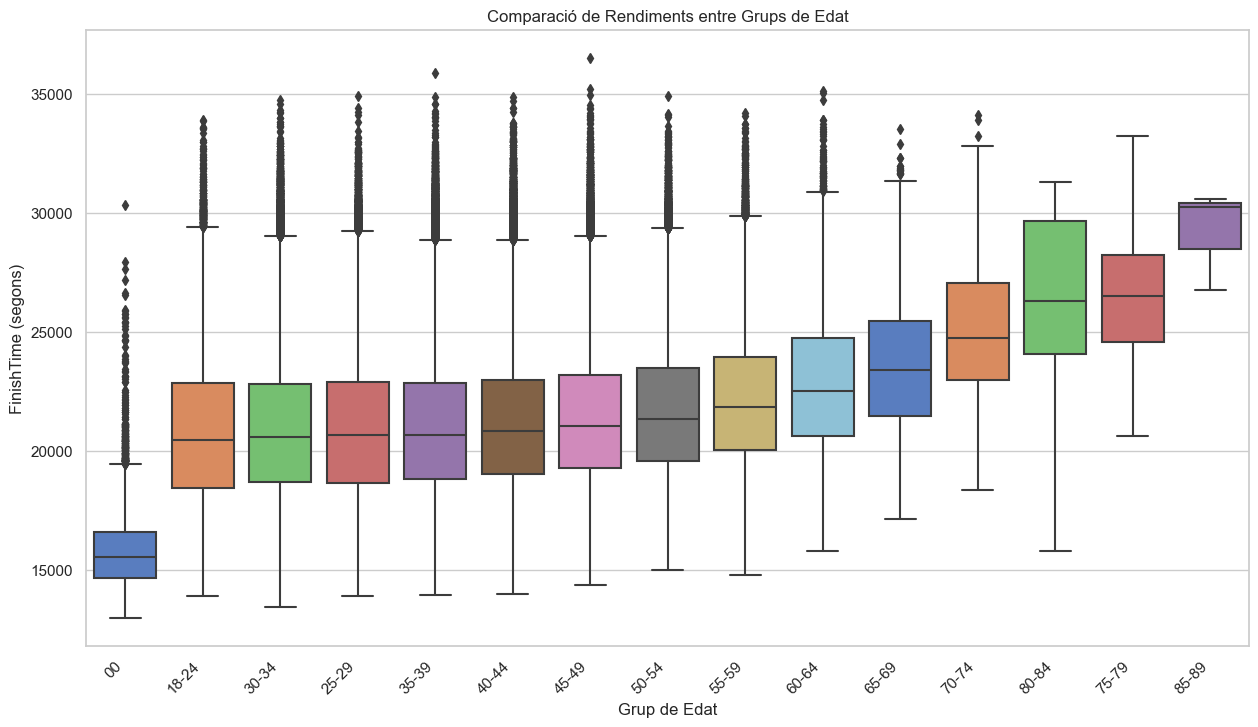

In [14]:
# Comparar els rendimients entre grups d'edat
plt.figure(figsize=(15, 8))
order = df.groupby('AgeGroup')['FinishTime'].median().sort_values().index
sns.boxplot(x='AgeGroup', y='FinishTime', data=df, palette='muted', order=order)
plt.title('Comparació de Rendiments entre Grups de Edat')
plt.xlabel('Grup de Edat')
plt.ylabel('FinishTime (segons)')
plt.xticks(rotation=45, ha='right')  
plt.show()

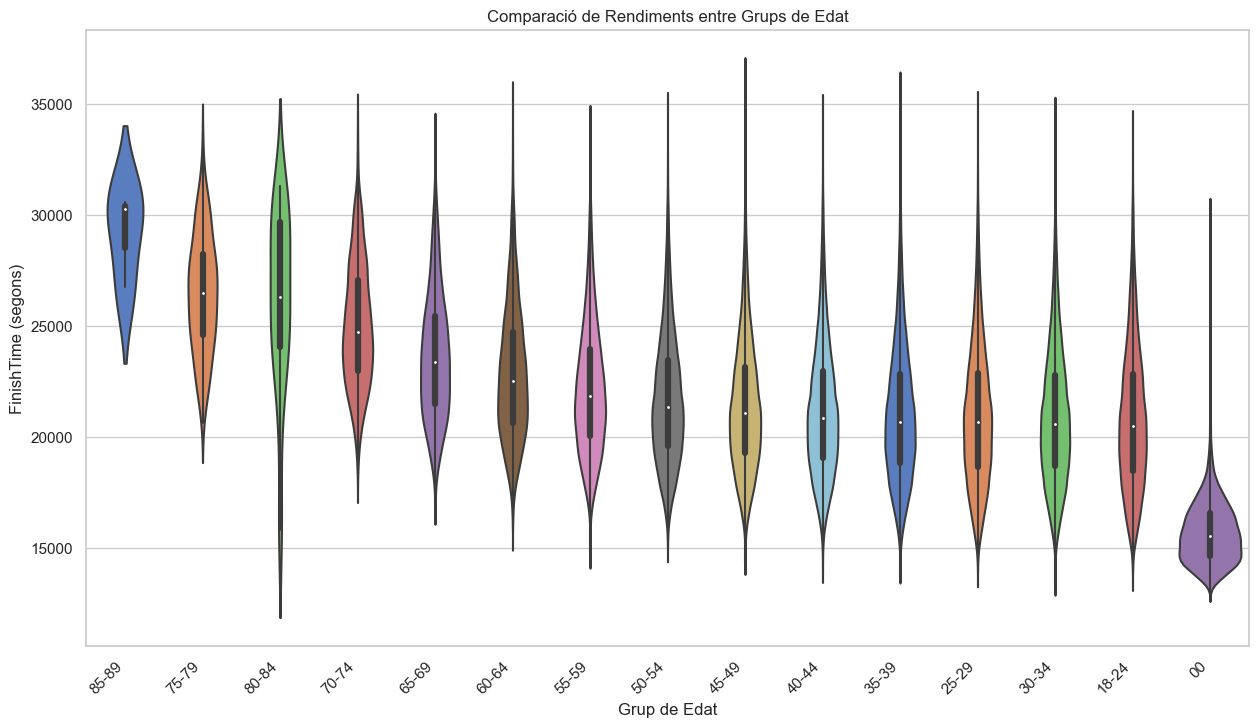

In [15]:
# Comparar los rendimientos entre grupos de edad (diagrama de violín)
plt.figure(figsize=(15, 8))
sns.violinplot(x='AgeGroup', y='FinishTime', data=df, palette='muted', order=df.groupby('AgeGroup')['FinishTime'].median().sort_values(ascending=False).index)
plt.title('Comparació de Rendiments entre Grups de Edat')
plt.xlabel('Grup de Edat')
plt.ylabel('FinishTime (segons)')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Events més freqüents

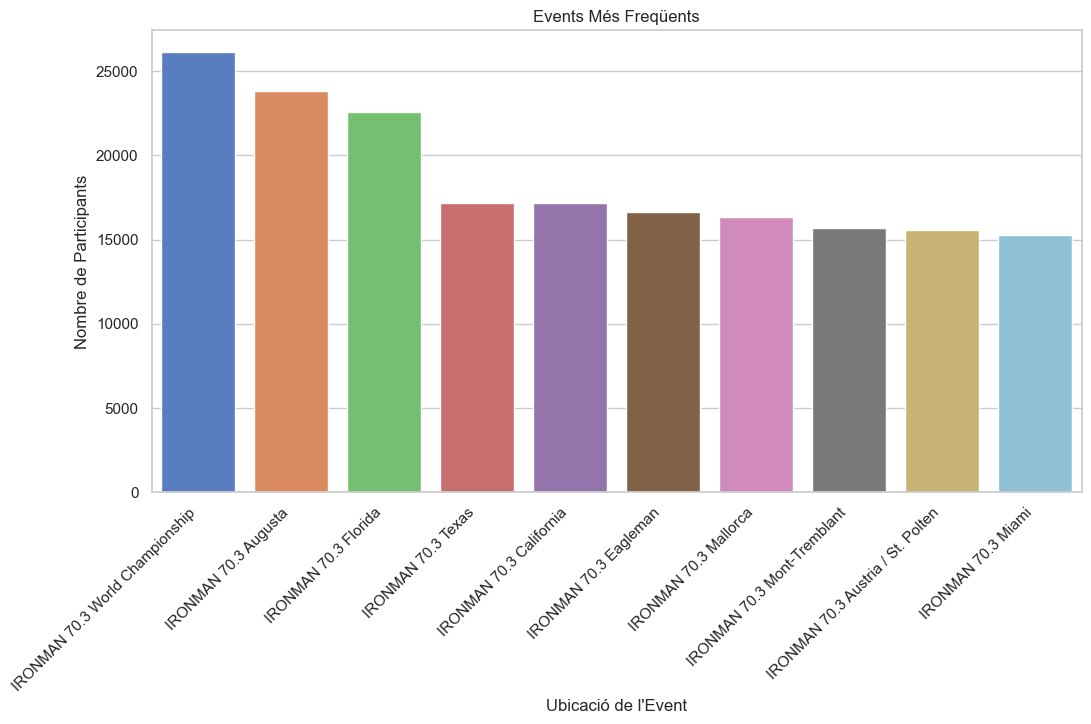

In [16]:
top_events = df['EventLocation'].value_counts().head(10)

df_top_events = df[df['EventLocation'].isin(top_events.index)]

plt.figure(figsize=(12, 6))
sns.countplot(x='EventLocation', data=df_top_events, palette='muted', order=top_events.index)
plt.title('Events Més Freqüents')
plt.xlabel('Ubicació de l\'Event')
plt.ylabel('Nombre de Participants')
plt.xticks(rotation=45, ha='right')  
plt.show()

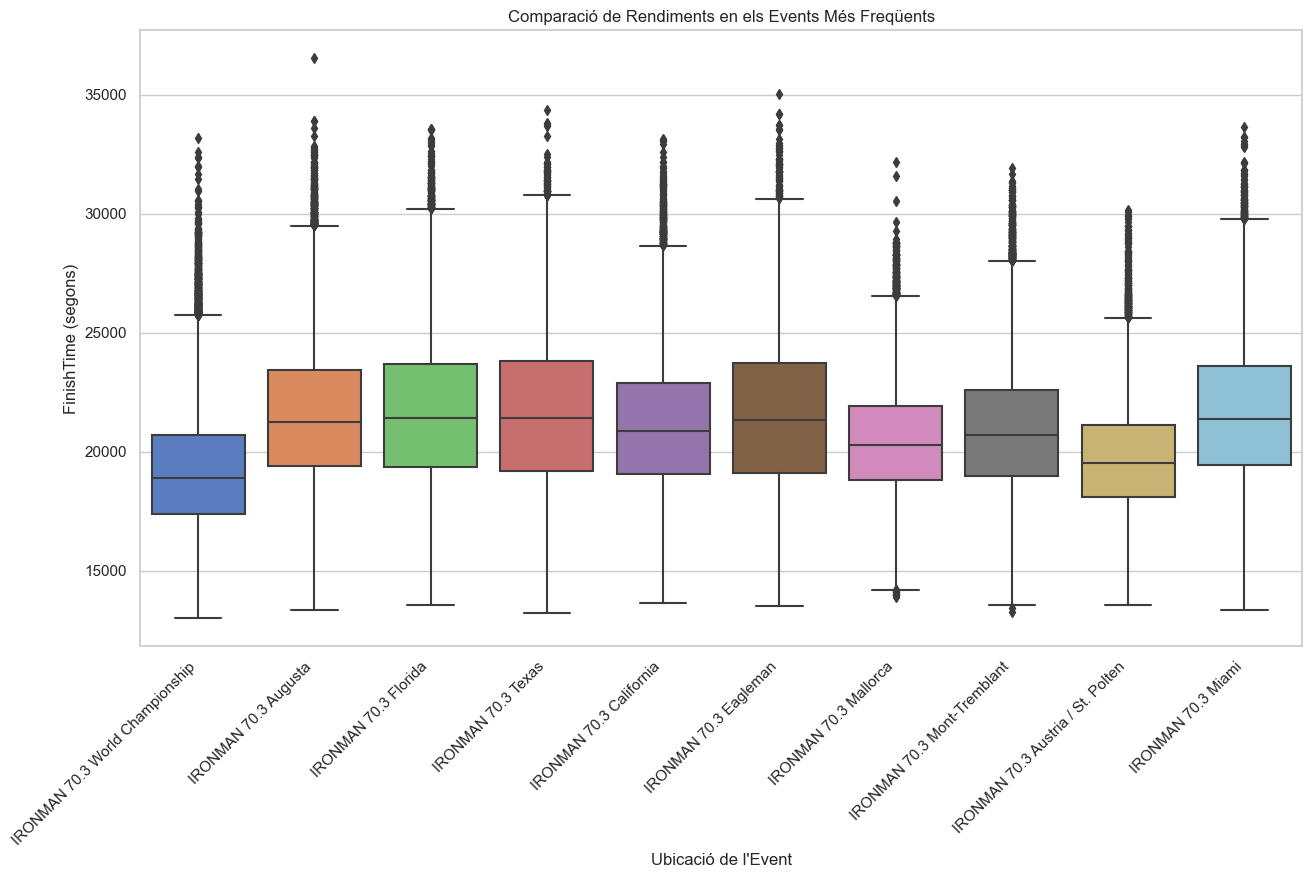

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='EventLocation', y='FinishTime', data=df_top_events, palette='muted', order=top_events.index)
plt.title('Comparació de Rendiments en els Events Més Freqüents')
plt.xlabel('Ubicació de l\'Event')
plt.ylabel('FinishTime (segons)')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Diferències de temps entre modalitats.

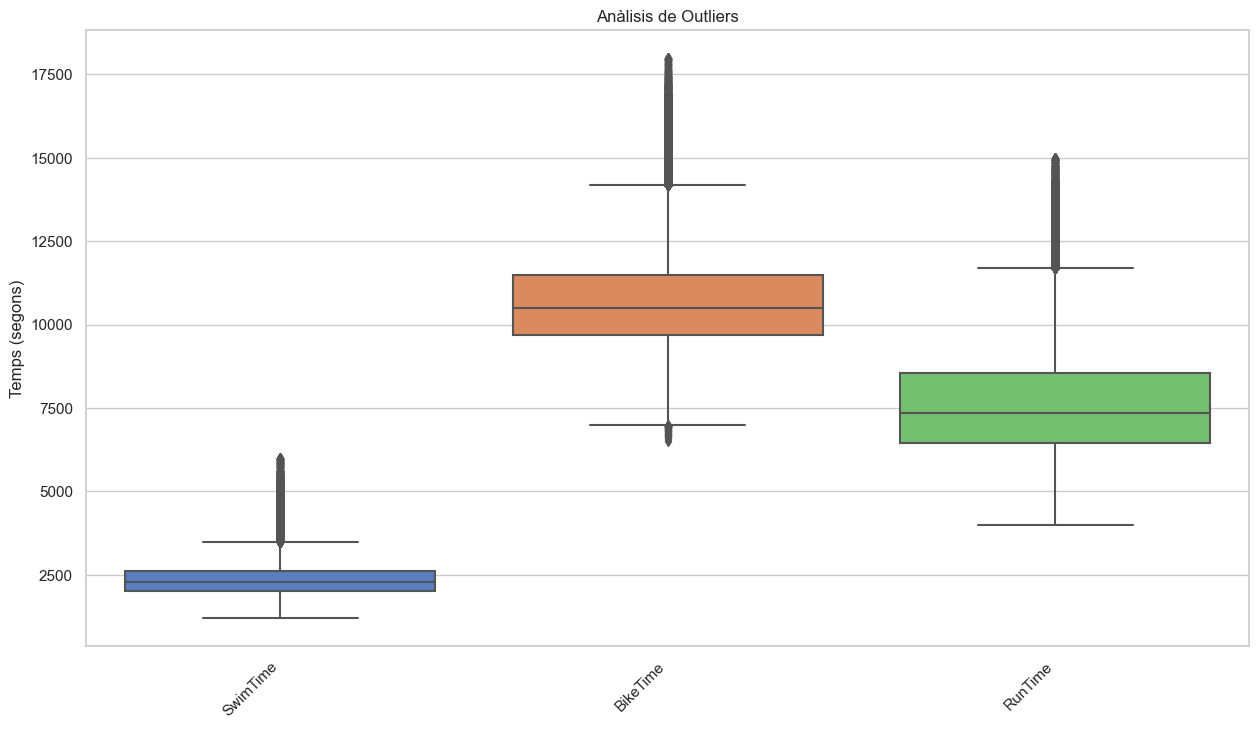

In [18]:
selected_numeric_variables = ['SwimTime', 'BikeTime', 'RunTime']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[selected_numeric_variables], palette='muted')
plt.title('Anàlisis de Outliers')
plt.ylabel('Temps (segons)')
plt.xticks(rotation=45, ha='right')  
plt.show()



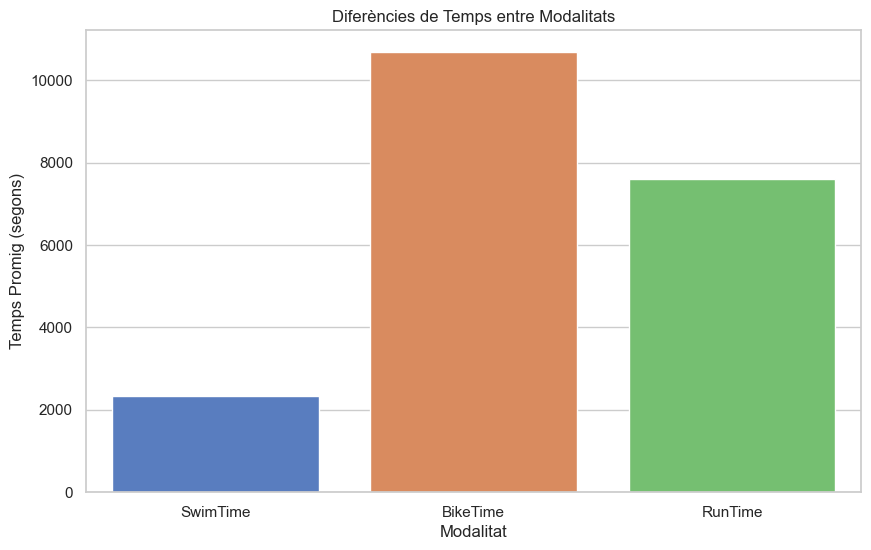

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_times = df[['SwimTime', 'BikeTime', 'RunTime']].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_times.index, y=mean_times.values, palette='muted')
plt.title('Diferències de Temps entre Modalitats')
plt.xlabel('Modalitat')
plt.ylabel('Temps Promig (segons)')
plt.show()


## Rendiment en funció del Gènere

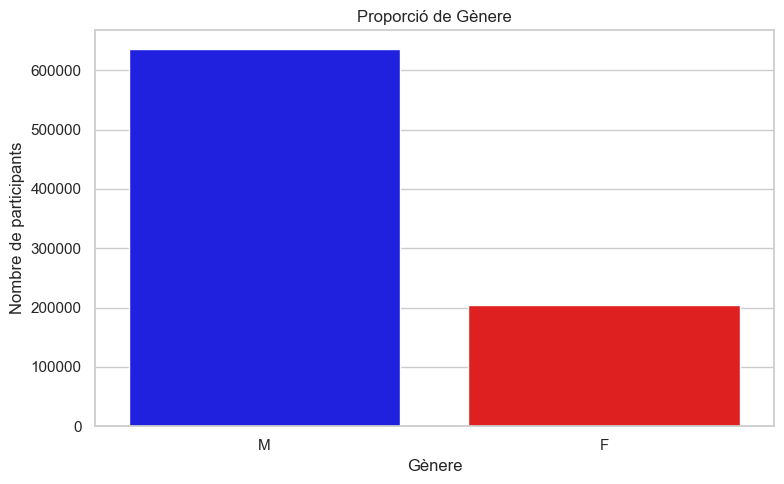

In [20]:
fcol = 'red'
mcol = 'blue'
# Examinar la Proporció de Gènere
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df,  palette={'M': mcol, 'F': fcol})
plt.title('Proporció de Gènere')
plt.xlabel('Gènere')
plt.ylabel('Nombre de participants')
plt.tight_layout()
plt.show()

In [21]:
# Calcula la proporció de gènere en percentatge
gender_proportion = df['Gender'].value_counts(normalize=True) * 100
gender_proportion


M    75.669434
F    24.330566
Name: Gender, dtype: float64

Si analitzem la proporció de gènere podem veure que aproximadament el 76% dels participants son homes i un 24 serien dones. Procedeixo a mirar la distribució de les variables tenint en compte el gènere:

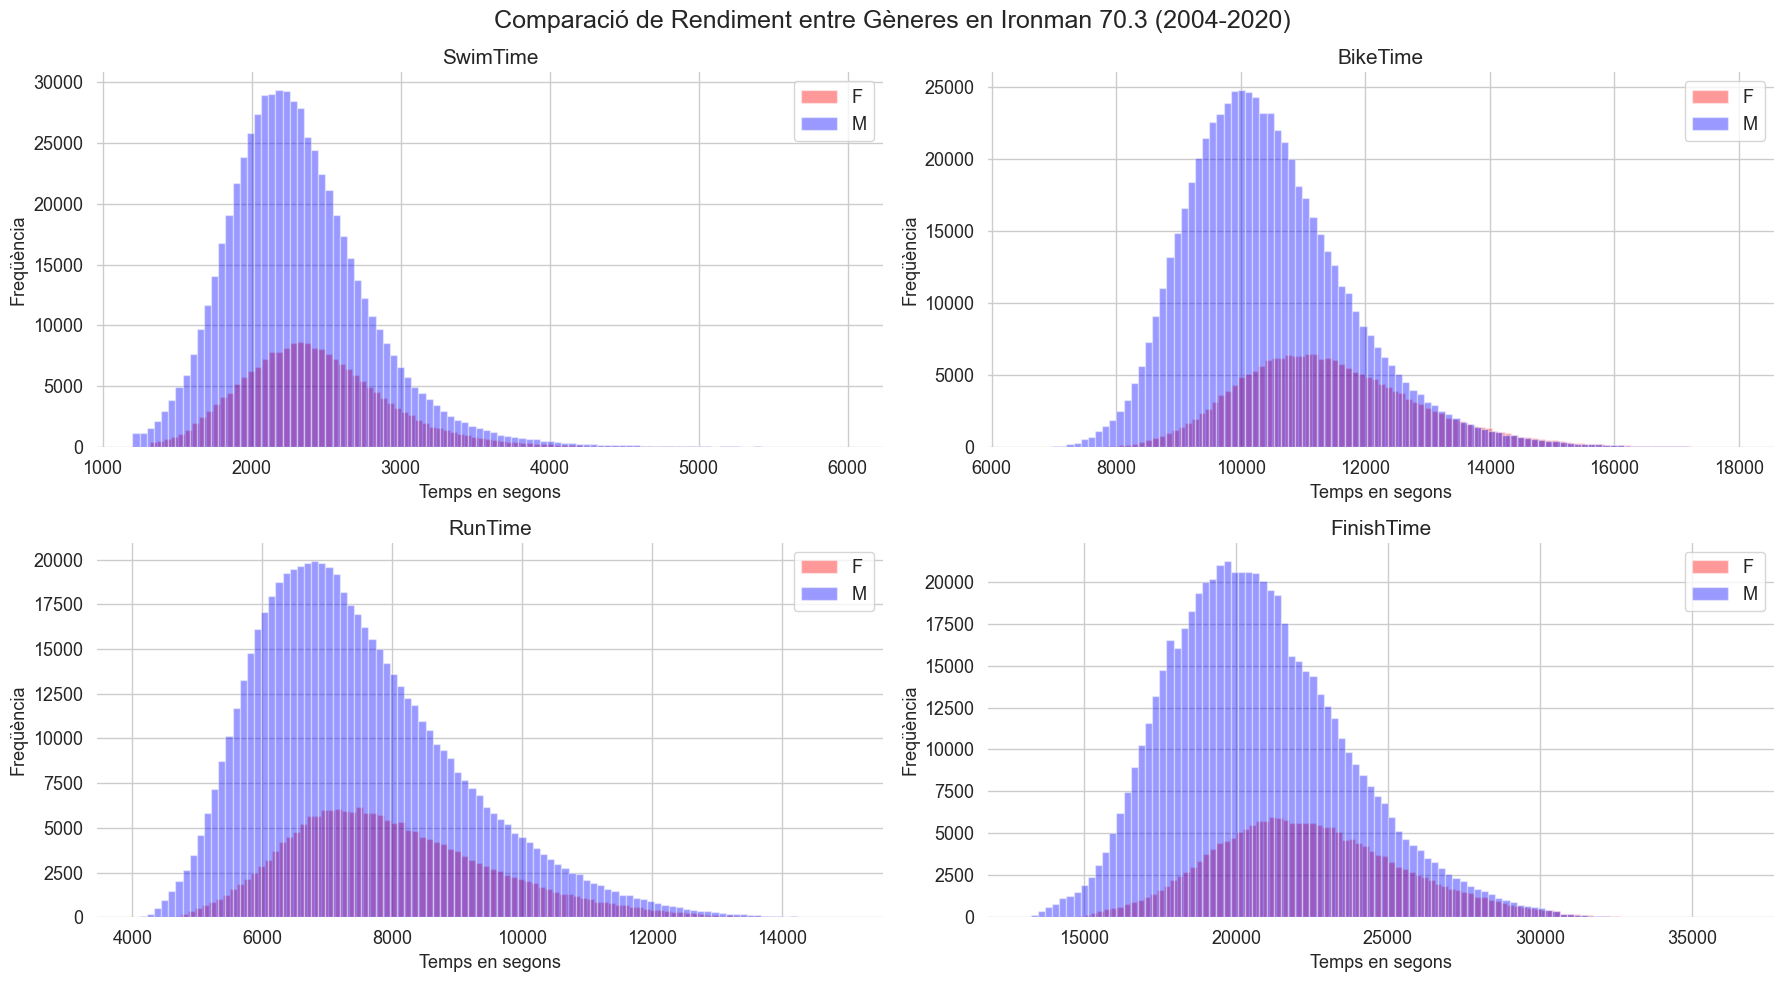

In [22]:
time_columns = ['SwimTime', 'BikeTime', 'RunTime', 'FinishTime']

fig, ax = plt.subplots(2, 2, figsize=(18, 10))
plt.suptitle("Comparació de Rendiment entre Gèneres en Ironman 70.3 (2004-2020)", fontsize=18)

for i in range(2):
    for j in range(2):
        col = time_columns[i * 2 + j]
        for gender, color in zip(['F', 'M'], [fcol, mcol]):
            ax[i, j].hist(df[df['Gender']==gender][col], bins=100, label=gender, color=color, alpha=0.4)
        
        ax[i, j].set_title(col, fontsize=15)
        ax[i, j].set_xlabel('Temps en segons', fontsize='13')
        ax[i, j].set_ylabel('Freqüència', fontsize='13')
        ax[i, j].tick_params(axis='both', which='major', labelsize=13)
        ax[i, j].legend(loc='upper right', fontsize='13')
        ax[i, j].spines["left"].set_visible(False)
        ax[i, j].spines["right"].set_visible(False)
        ax[i, j].spines["top"].set_visible(False)
        ax[i, j].spines["bottom"].set_visible(False)
plt.tight_layout()
plt.show()


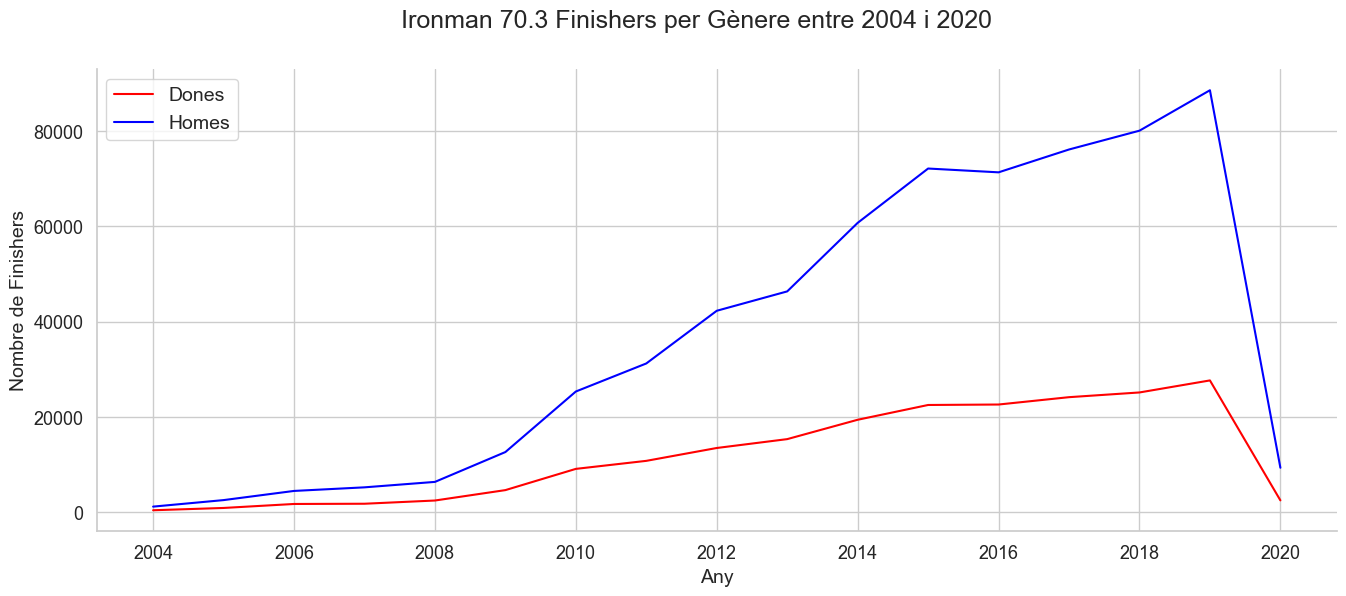

In [23]:
fcol = 'red'
mcol = 'blue'

# Evolució del nombre de finalistes per gènere
female_finishers_by_year = df[df['Gender'] == 'F'].groupby('EventYear').size()
male_finishers_by_year = df[df['Gender'] == 'M'].groupby('EventYear').size()

# Grafic de linies
plt.figure(figsize=(16, 6))
plt.suptitle("Ironman 70.3 Finishers per Gènere entre 2004 i 2020", fontsize=18)

plt.plot(female_finishers_by_year.index, female_finishers_by_year, label='Dones', lw=1.5, color=fcol)
plt.plot(male_finishers_by_year.index, male_finishers_by_year, label='Homes', lw=1.5, color=mcol)

plt.xlabel('Any', fontsize='14')
plt.ylabel('Nombre de Finishers', fontsize='14')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='upper left', fontsize='14')
sns.despine()

plt.show()


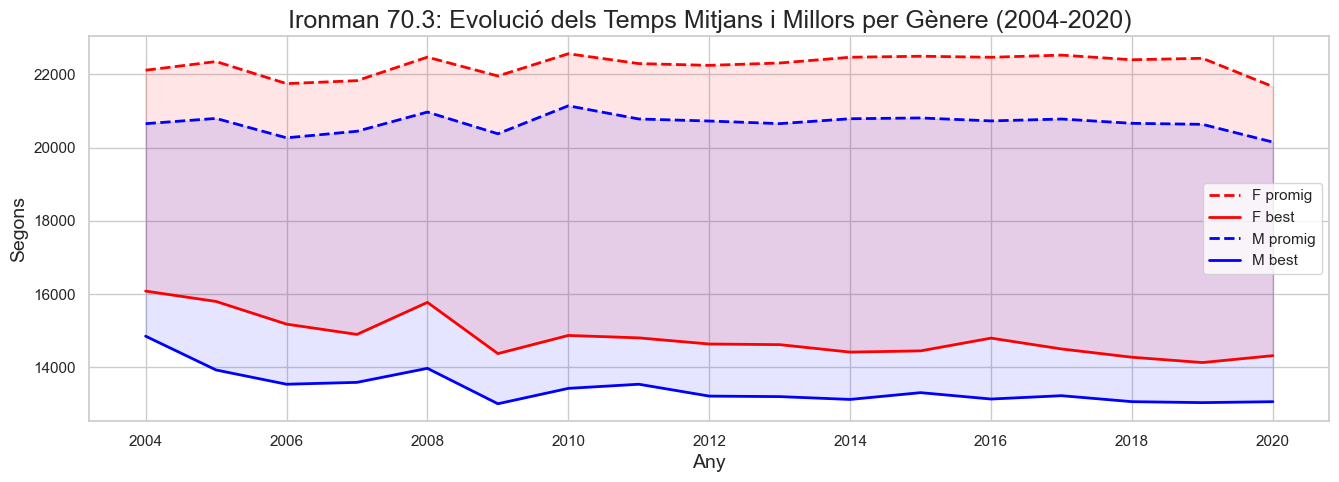

In [24]:
female_data = df[df['Gender']=='F']
male_data = df[df['Gender']=='M']

plt.figure(figsize=(16, 5))
plt.title("Ironman 70.3: Evolució dels Temps Mitjans i Millors per Gènere (2004-2020)", fontsize=18)

for data, label, color in zip([female_data, male_data], ['F', 'M'], [fcol, mcol]):
    avg_time = data.groupby('EventYear')['FinishTime'].mean()
    best_time = data.groupby('EventYear')['FinishTime'].min()

    plt.plot(avg_time.index, avg_time, label=f'{label} promig', lw=2, color=color, linestyle='--')
    plt.plot(best_time.index, best_time, label=f'{label} best', lw=2, color=color)
    plt.fill_between(avg_time.index, best_time, avg_time, color=color, alpha=0.1)

plt.xlabel('Any', fontsize='14')
plt.ylabel('Segons', fontsize='14')
plt.legend()
plt.show()



In [25]:
# Funció per calcular el temps com a HH:MM:SS a partir del nombre de segons.
def time_in_HHMMSS(total_seconds):
    total_seconds = int(total_seconds)
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    hours, minutes, seconds = map(int, (hours, minutes, seconds))
    SS = str(seconds).rjust(2, '0')
    MM = str(minutes).rjust(2, '0')
    HH = str(hours).rjust(2, '0')
    return f"{HH}:{MM}:{SS}"

# Funció per convertir els temps de segons a HH:MM:SS per a un gènere específic.
def convert_to_HHMMSS(df, gender):
    columns = ['SwimTime', 'BikeTime', 'RunTime', 'FinishTime']
    df_gender = df[df['Gender'] == gender][columns].aggregate(['mean', 'std', 'min', 'max'])
    
    for x in columns:
        df_gender[x] = df_gender[x].apply(time_in_HHMMSS)
    
    df_gender.columns = pd.MultiIndex.from_product([[f"{gender} stats"], df_gender.columns])
    return df_gender

df_male_stats = convert_to_HHMMSS(df, 'M')
df_female_stats = convert_to_HHMMSS(df, 'F')

df_mf_HMS = pd.concat([df_male_stats, df_female_stats], axis=1)
df_mf_HMS


M stats                                  F stats                      \
      SwimTime  BikeTime   RunTime FinishTime  SwimTime  BikeTime   RunTime   
mean  00:38:30  02:53:54  02:04:33   05:45:21  00:40:33  03:10:24  02:13:41   
std   00:07:58  00:21:40  00:26:11   00:49:19  00:08:17  00:23:46  00:26:06   
min   00:20:01  01:48:31  01:06:42   03:36:44  00:22:01  02:01:30  01:10:15   
max   01:39:57  04:59:53  04:09:59   10:08:49  01:39:56  04:59:47  04:09:43   

                 
     FinishTime  
mean   06:13:17  
std    00:51:25  
min    03:55:29  
max    09:58:19

## Rendiment en funció del Grup d'Edat i Gènere

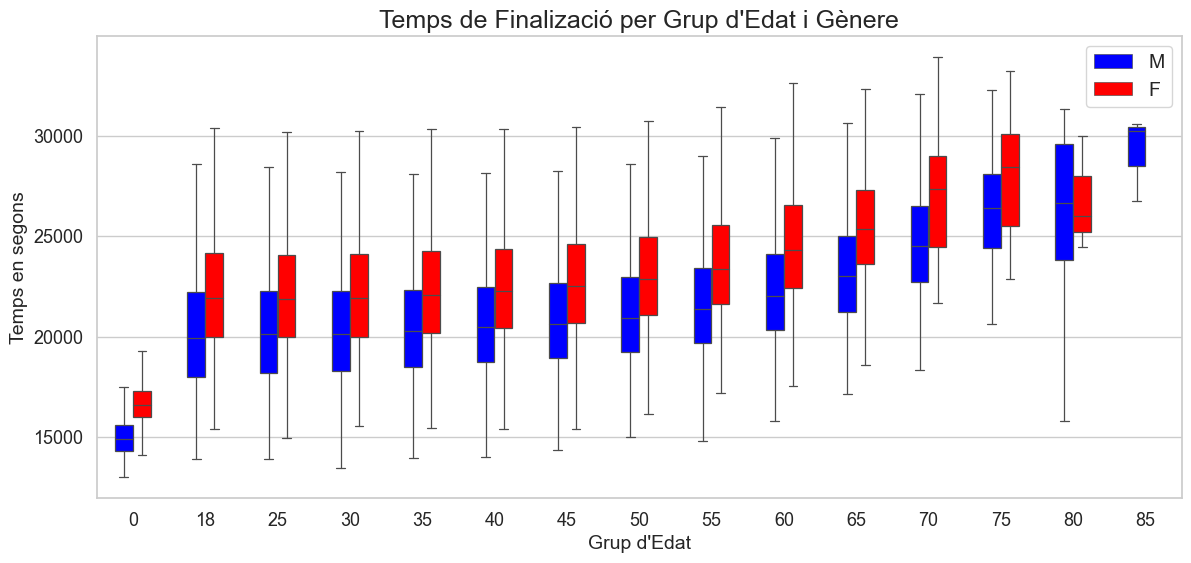

In [26]:
palette_colors = {'M': mcol, 'F': fcol}

plt.figure(figsize=(14, 6))
sns.boxplot(x="AgeBand", y="FinishTime", hue="Gender", data=df, 
            palette=palette_colors, width=0.5, linewidth=0.9, showfliers=False, saturation=1)

plt.title("Temps de Finalizació per Grup d'Edat i Gènere", fontsize=18)
plt.xlabel("Grup d'Edat", fontsize=14)
plt.ylabel('Temps en segons', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=14)
plt.show()


En el grafic superior es pot veure la diferencia de rendiment entre els PRO i els grups d'edat. Tenint en compte que els PROS no estan classificats per edat. Hi ha una diferencia de mes 5000 segons (1:23h). En canvi si mirem el rediment entre els grups d'edat 18 i 45, es manté estable.

In [27]:
df.to_csv('Half_Ironman.csv', index=False)